<a href="https://colab.research.google.com/github/AlexyNat/ml/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><u>Лабораторная работа №3. Линейная регрессия</u></h1>

<h3>Общее задание</h3>

<p>Перед выполнением лабораторной работы необходимо загрузить набор данных в соответствии с вариантом на диск
</p>
<ol>
  <li>Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, test set). Использовать стандартные функции (train_test_split и др. нельзя).</li>
  <li>С использованием библиотеки <a href="http://scikit-learn.org/stable/">scikit-learn</a> обучить модель линейной регрессии по обучающей выборке <a href="https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py">пример</a></li>
  <li>Проверить точность модели по тестовой выборке</li>
  <li>Построить модель с использованием полиномиальной функции <a href="http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py">пример</a>. Построить графики зависимости точности на обучающей и тестовой выборке от степени полиномиальной функции.
  </li>
  <li>Построить модель с использованием регуляризации <a href="https://github.com/ulstu/ml/blob/master/ml_course_en/lecture04.%20Decision%20trees.%20KNN.%20Logistic%20regression.%20Regularization/Lecture%2004-03%20Lasso_ridge.ipynb">пример</a>. На основе экспериментов подобрать параметры для регуляризации. Построить графики зависимости точности модели на обучающей и тестовой выборках от коэффициента регуляризации.</li>
</ol>

<h2>Вариант 21 - Bike Sharing Dataset</h2>

<p>Этот набор данных содержит ежедневное количество арендованных велосипедов в период с 2011 по 2012 год в системе Capital bikeshare с соответствующей информацией о погоде и сезонах. </p>

<h4>Информация о признаках</h4>

<ul>
  <li>instant: Номер записи </li>
  <li>dteday : Дата записи </li>
  <ul>
    <li>yr : год (0: 2011, 1:2012)</li>
    <li>mnth : месяц ( 1 to 12)</li>
    <li>hr : час (0 to 23)</li>
  </ul>
  <li>season : Время года (1:зима, 2:весна, 3:лето, 4:осень)</li>
  <li>holiday : День является праздником или нет (1 или 0)</li>
  <li>weekday : День недели (0..6) </li>
  <li>workingday : Если день рабочий, то 1 иначе 0</li>
  <li>weathersit - Погодные условия</li>
  <ol>
    <li>Clear, Few clouds, Partly cloudy, Partly cloudy</li>
    <li>Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
    <li>Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
    <li>Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</li>
  </ol>
  <li>temp : Нормализованная температура в градусах Цельсия. Значения выводятся через (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (только в часовой шкале)</li>
  <li>atemp: Нормализованная температура тела в градусах Цельсия. Значения выводятся через (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (только в часовой шкале))</li>
  <li>hum: Нормализованная влажность. Значения делятся на 100 (макс.)</li>
  <li>windspeed: Нормализованная скорость ветра. Значения делятся на 67 (макс.)</li>
</ul>
<h4>Информация о целевых значениях</h4>
<ul>
  <li>casual: количество случайных пользователей</li>
  <li>registered: количество зарегистрированных пользователей</li>
  <li>cnt: общее число пользователей</li>
</ul>


<h3>Получаем данные из файла</h3>

In [1]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np

# устанавливаем признаки и целевые значения
features = ['yr','mnth','hr','season','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed']
target = ['cnt'] # casual,registered,cnt

# получаем данные
data = pd.read_csv('sample_data/hour.csv')
data = data.loc[:, features + target]
print('Число данных: ', data.shape)

Число данных:  (17379, 13)


<h3>Разделяем данные</h3>

In [2]:
scale = 0.7
split = np.floor(data.shape[0] * scale).astype(int)

idx = np.random.permutation(data.shape[0])
idx_train = idx[:split]
idx_test = idx[split:]

train = list((data.loc[idx_train, features], data.loc[idx_train, target]))
test =  list((data.loc[idx_test, features].reset_index(drop=True), data.loc[idx_test, target].reset_index(drop=True)))
print('Тренеровочные данные: ', train[0].shape, train[1].shape)
print('Тестовые данные: ', test[0].shape, test[1].shape)

Тренеровочные данные:  (12165, 12) (12165, 1)
Тестовые данные:  (5214, 12) (5214, 1)


<h3>Масштабирование признаков</h3>

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[0] = scaler.fit_transform(train[0])
test[0] = scaler.transform(test[0])

<h3>Обучаем модель линейной регрессии по обучающей выборке</h3>

In [4]:
from sklearn.linear_model import LinearRegression as Model

m = Model()
m.fit(train[0], train[1])

LinearRegression()

<h3>Предсказываем целевые значения</h3>

In [5]:
# передаем обучающую и тестовую выборку признаков
predict_train = m.predict(train[0])
predict_test = m.predict(test[0])

<h3>Проверяем точность модели по тестовой выборке</h3>

In [6]:
# определение точности модели по коэффициенту детерминации
from sklearn.metrics import r2_score

print(f'Коэффициент детерминации для обучающей выборки: {r2_score(train[1], predict_train)}')
print(f'Коэффициент детерминации для тестовой выборки:  {r2_score(test[1], predict_test)}')

Коэффициент детерминации для обучающей выборки: 0.38616548237118853
Коэффициент детерминации для тестовой выборки:  0.3947892119407309


<h3>Построим модель с использованием полиномиальной функции</h3>

Степень полинома: 1
Коэффициент детерминации для обучающей выборки: 0.38616548237118853 и тестовой выборки: 0.3947892119407309
Степень полинома: 2
Коэффициент детерминации для обучающей выборки: 0.5491344153681369 и тестовой выборки: 0.5506277256388257
Степень полинома: 3
Коэффициент детерминации для обучающей выборки: 0.6410118214803153 и тестовой выборки: 0.6419498432576703
Степень полинома: 4
Коэффициент детерминации для обучающей выборки: 0.71185104162214 и тестовой выборки: -46159365.864913724


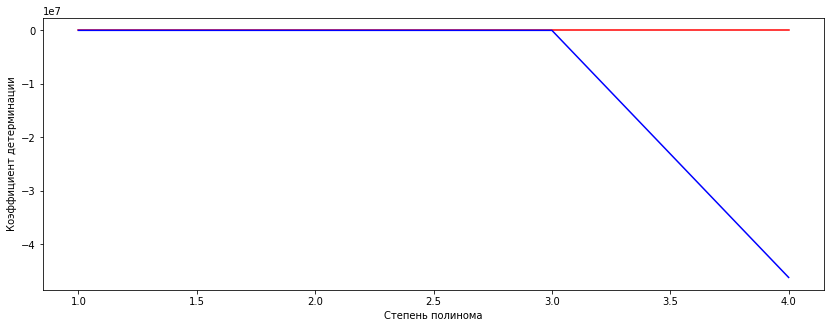

In [7]:
from sklearn.preprocessing import PolynomialFeatures as PModel
from sklearn.linear_model import LinearRegression as LModel
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

degrees = (1, 2, 3, 4, ) # степень полинома
plt.figure(figsize=(14, 5))

train_pred_list = []
test_pred_list = []

for _, degree in enumerate(degrees):
  polynomial_features = PModel(degree=degree, include_bias=False)
  linear_regression = LModel()
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
  
  # Обучение модели
  pipeline.fit(train[0], train[1])

  # Предсказываем целевые значения
  predict_train = pipeline.predict(train[0])
  predict_test = pipeline.predict(test[0])

  train_pred_list.append(r2_score(train[1], predict_train))
  test_pred_list.append(r2_score(test[1], predict_test))


  print(f'Степень полинома: {degree}')
  print(f'Коэффициент детерминации для обучающей выборки: {train_pred_list[-1]} \
и тестовой выборки: {test_pred_list[-1]}')

plt.xlabel("Степень полинома")
plt.ylabel("Коэффициент детерминации")
plt.plot(degrees, train_pred_list, "r-", degrees, test_pred_list,"b-")
plt.show()

<h3>Построим модель с использованием регуляризации</h3>

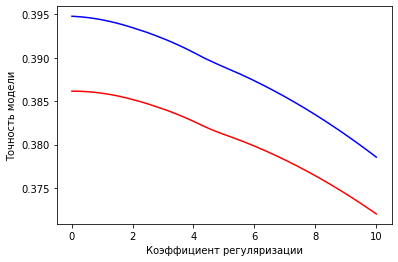

In [8]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from matplotlib import cycler
import numpy as np

n_alphas = 200
alphas = np.linspace(0.01, 10, n_alphas)

model = Lasso()
score = [[], []]

for a in alphas:
    model.set_params(alpha=a)
    model.fit(train[0], train[1])
    score[0].append(model.score(train[0], train[1]))
    score[1].append(model.score(test[0], test[1]))


plt.xlabel("Коэффициент регуляризации")
plt.ylabel("Точность модели")
plt.plot(alphas, score[0], "r-", alphas, score[1],"b-")
plt.show()

<h3>L2 регуляризация</h3>

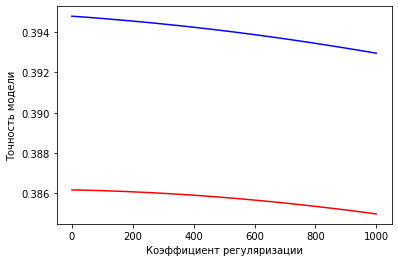

In [15]:
from sklearn.linear_model import Ridge

n_alphas = 200
alphas = np.linspace(0.01, 1000, n_alphas)

model = Ridge()
score = [[], []]

for a in alphas:
    model.set_params(alpha=a)
    model.fit(train[0], train[1])
    score[0].append(model.score(train[0], train[1]))
    score[1].append(model.score(test[0], test[1]))

plt.xlabel("Коэффициент регуляризации")
plt.ylabel("Точность модели")
plt.plot(alphas, score[0], "r-", alphas, score[1],"b-")
plt.show()